# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [19]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [20]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [21]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

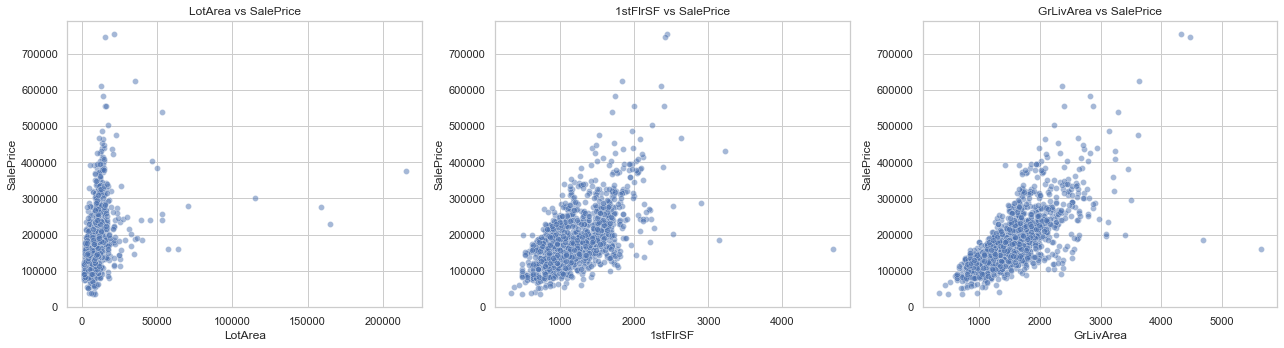

In [22]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
import seaborn as sns


#Set style for better visual
sns.set(style = "whitegrid", context = "notebook")


#Define features of plot
features = ['LotArea','1stFlrSF', 'GrLivArea']

#Create scatter plots
plt.figure(figsize=(18,5))

for i, feature in enumerate (features):
    plt.subplot(1,3, i + 1)
    sns.scatterplot(data=ames_subset, x = feature, y ='SalePrice', alpha = 0.5)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [23]:
# Your written answer here - do these seem like good candidates for linear regression?
#Only GrLivArea and 1stFlrSF

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [32]:
# Your code here - define y and baseline X

X = ames_subset['GrLivArea']
Y = ames_subset['SalePrice']


In [33]:
# Your code here - import StatsModels, fit baseline model, display results

import statsmodels.api as sm


#Add a constant to the independent variable

X = sm.add_constant(X)

#Build a linear regression model
model = sm.OLS(y, X). fit()


#Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          4.52e-223
Time:                        16:38:54   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [35]:
# Your written answer here - interpret model results
#The linear regression model shows that GrLivArea is a great predictor of SalePrice
#The model explains a moderate portion of the variation in prices

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [36]:
# Your code here - define X

X = ames_subset [["GrLivArea", "LotArea", '1stFlrSF']]

In [38]:
# Your code here - fit model and display results

Y = ames_subset['SalePrice']

X = sm.add_constant(X)

model_multi= sm.OLS(y,X).fit()

print(model_multi.summary(X))

                                                                                                                                                                                     OLS Regression Results                                                                                                                                                                                    
Dep. Variable:           const  GrLivArea
Id                    
1       1.0       1710
2       1.0       1262
3       1.0       1786
4       1.0       1717
5       1.0       2198
...     ...        ...
1456    1.0       1647
1457    1.0       2073
1458    1.0       2340
1459    1.0       1078
1460    1.0       1256

[1460 rows x 2 columns]   R-squared:                       0.502
Model:                                                                                                                                                                                                                                  

In [39]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?

#This model performs better than linear regression model but one has to be careful of multicollinearity which is can be affected by "1stFlrSf" and "GrLivArea"

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

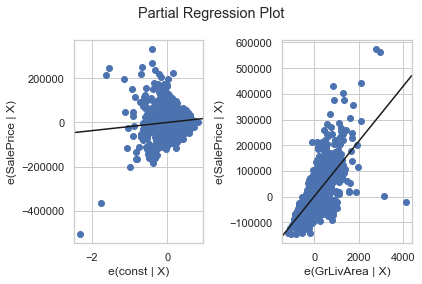

In [40]:
# Your code here - create partial regression plots for each predictor

fig = sm.graphics.plot_partregress_grid(model_multi)
fig.tight_layout(pad=1.0)
plt.show()

In [43]:
# Your written answer here - explain what you see, and how this relates
# - Each plot shows the relationship between one feature and SalePrice
# - It is easy to see linear relationship with SalePrice after controlling others
# to what you saw in Step 1. What do you notice?
# - helps identify redundant or less informative predictors
# - strong trends in partial plots confirm that features unique contribution

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [46]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
X = ames_subset[['GrLivArea']]
y = ames_subset['SalePrice']

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [51]:
# Your code here - compare R-Squared
from sklearn.metrics import r2_score

y_pred = lr.predict(X)

#Compare R2 squared
r2_sklearn = r2_score (y, y_pred)

print(f"scikit-learn R-squared: {r2_sklearn:.4f}")

#Compare with statsmodel R squared
print(f"StatsModels R-squared: {model_multi.rsquared:.4f}")


scikit-learn R-squared: 0.5021
StatsModels R-squared: 0.5021


In [52]:
# Your code here - compare intercept and coefficients

# scikit-learn intercept and coefficients
print(f"scikit-learn intercept: {lr.intercept_:.4f}")
print(f"scikit-learn coefficients: {lr.coef_}")

# statsmodels intercept and coefficients
print(f"StatsModels intercept: {model_multi.params['const']:.4f}")
print(f"StatsModels coefficients:\n{model_multi.params.drop('const')}")


scikit-learn intercept: 18569.0259
scikit-learn coefficients: [107.13035897]
StatsModels intercept: 18569.0259
StatsModels coefficients:
GrLivArea    107.130359
dtype: float64


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.